In [1]:
# LearningML - Day Five
# (note: I'm departing from the day numbering used in 100 Days of ML Learning since Avik uses some days to
#  to do literature reading and study, I'm going to continue to focus on code examples)

# Today's topic is K Nearest Neighbors (KNN) which is another classification algorithm. However, unlike
# Logistic Regression, which was a classification algorithm as well and is used to determine if a dependent
# variable is part of some group (yes or no), KNN can be used to determine class membership from across two or more
# classes. Both algorithms produce a discrete value.

# Another important difference is KNN is non-parametric, that is, it does not make any assumptions about the underlying 
# data distribution though, the algorithm is sensitive to the "structure" of the data since distance
# calculations are being made, usually using Euclidian distances (physical/geometric distance). Also KNN doesn't 
# actually construct or learn a model, it takes the data values in that instant and determines the relationships between
# the dependent variable and the independent variable values based on the current situation. This means new data can
# easily be added because there is no training needed.

# set up the libraries to be used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# import the dataset

dataset = pd.read_csv('data/Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# the x data frame contains only the age and salary data
print('x values look like ', x[6:9])

# the y vector contains the binary data on whether the user bought the SUV or not
print('y values look like ', y[6:9])



x values look like  [[    27  84000]
 [    32 150000]
 [    25  33000]]
y values look like  [0 1 0]


In [30]:
# as usual, we split our dataset into a training set for the model, and a test set
# I like to use an 80/20 split
#
# NOTE: In the associated code in github, the train_test_split library is retrieved from the sklearn.cross_validation
# package but in sklean 0.20.x, the library is now located in the model_selection package
#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

print ('The size/shape of our training set is ', x_train.shape, y_train.shape)
print ('The size/shape of our test set is ',x_test.shape, y_test.shape)

print (x_test[:10])

The size/shape of our training set is  (320, 2) (320,)
The size/shape of our test set is  (80, 2) (80,)
[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]]


In [31]:
# again, we're going to do standard scaling on our dataset, especially since the algorithm is calculating distances
# between data points. By scaling, we normalize the range of values of the raw data so that the distance calculations
# are not unduely influenced by data values with wide ranges.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_norm = sc.fit_transform(x_train)
x_test_norm = sc.transform(x_test)

print('Here is the scaled training data ', x_train_norm[:10])
print('Here is the scaled test data ', x_train_norm[:10])

Here is the scaled training data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]
Here is the scaled test data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
# now we use the KNN classifier to fit to the training data set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5) # default metric is minkowski with p=2
classifier.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
# now we generate a prediction using the test set

y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [34]:
# let's review the prediction accuracy using a confusion matrix

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))


[[51  7]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.68      0.68      0.68        22

   micro avg       0.82      0.82      0.82        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.82      0.82      0.82        80



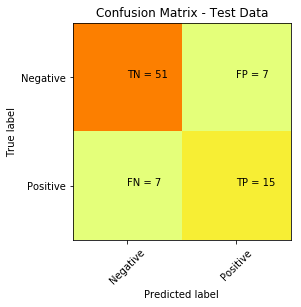

In [35]:
# so, based on the classification report, our KNN classifier is 88% accurate in identifying true positives 
# and true negatives. That's not very good. Here's a better view of the confusion matrix
# 
# Thanks to the following site for excellent plot code for confusion matrices: 
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()



Text(0, 0.5, 'Mean Error')

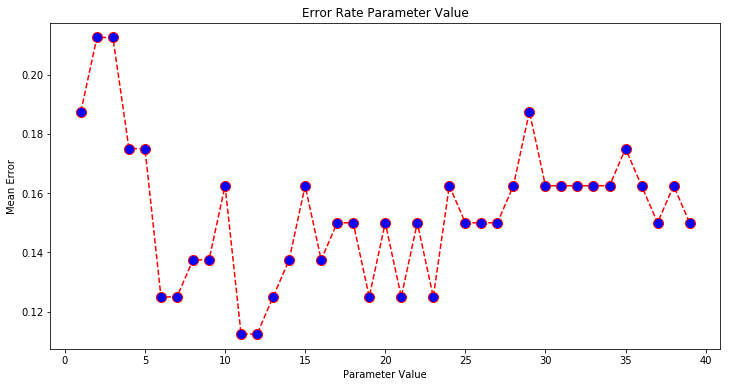

In [36]:
# recall that in applying the KNN algorithm we selected a parameter "n_neighbors" somewhat randomly. 
# Let's compare the error rate of our classifier algorithm using different values of the parameter.
#
error = []

# calculate the error rate for parameter value between 1 and 40
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    p = knn.predict(x_test)
    error.append(np.mean(p != y_test))
    
# now plot the error rate versus the parameter value used in the KNN algorithm
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate Parameter Value')
plt.xlabel('Parameter Value')
plt.ylabel('Mean Error')


In [37]:
# according to our error rate analysis, a parameter value of 11 or 12 should provide us with much better results.
# let's rerun our KNN algorithm using a parameter value of 12

new_classifier = KNeighborsClassifier(n_neighbors = 12) # default metric is minkowski with p=2
new_classifier.fit(x_train, y_train)

new_y_pred = new_classifier.predict(x_test)

new_cm = confusion_matrix(y_test, new_y_pred)

print(new_cm)
print(classification_report(y_test, new_y_pred))



[[56  2]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.88      0.68      0.77        22

   micro avg       0.89      0.89      0.89        80
   macro avg       0.89      0.82      0.85        80
weighted avg       0.89      0.89      0.88        80



In [38]:
# our overall algorithm performance is better as reflected by the f1-score (closer to 1.0 the better). 
# if you'll recall, we used the same dataset for our analysis in DayThree with the Logistic Regression model.
# reviewing the performance of that model, we had a f1-score of .94 with slightly better precision.
# so, for our first example of comparing the performance of two different classification models where we're trying
# to predict if someone is likely to purchase the SUV, that is, does the individual belong to the class of SUV 
# purchasers with high probability, we see the Logistic model will gives us slightly better prediction results 
# based on the data set we currently have available.
